In [1]:
import json, sys, random
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPool2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import utils
import tensorflow.keras.callbacks
from tensorflow.keras.layers import Dropout

from PIL import Image, ImageDraw 

from matplotlib import pyplot as plt

In [2]:
f = open('shipsnet.json')
dataset = json.load(f)
f.close()

In [3]:
input_data = np.array(dataset['data']).astype('uint8')
output_data = np.array(dataset['labels']).astype('uint8')

In [4]:
input_data.shape

(4000, 19200)

In [5]:
output_data.shape

(4000,)

In [6]:
output_data

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [7]:
n_spectrum = 3 # color chanel (RGB)
weight = 80
height = 80
X = input_data.reshape([-1, n_spectrum, weight, height])
X[0].shape

(3, 80, 80)

In [8]:
pic = X[0]

rad_spectrum = pic[0]
green_spectrum = pic[1]
blue_spectum = pic[2]

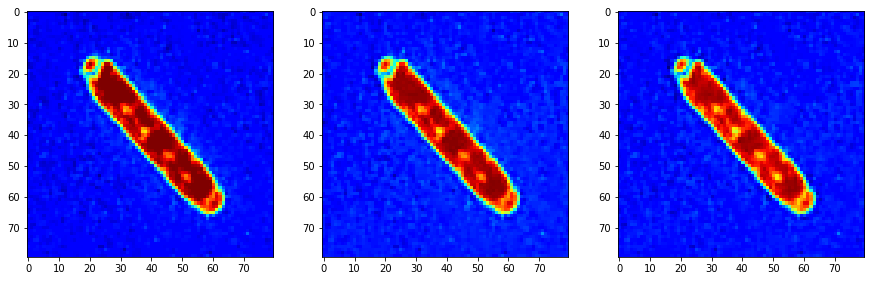

In [9]:
plt.figure(2, figsize = (5*3, 5*1))
plt.set_cmap('jet')

# show each channel
plt.subplot(1, 3, 1)
plt.imshow(rad_spectrum)

plt.subplot(1, 3, 2)
plt.imshow(green_spectrum)

plt.subplot(1, 3, 3)
plt.imshow(blue_spectum)
    
plt.show()

In [10]:
y = utils.to_categorical(output_data, 2)

In [11]:
# shuffle all indexes
indexes = np.arange(2800)
np.random.shuffle(indexes)

In [12]:
X_train = X[indexes].transpose([0,2,3,1])
y_train = y[indexes]


In [13]:
# normalization
X_train = X_train / 255

# Training Network

In [14]:
np.random.seed(42)

In [15]:
# network design
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [16]:
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])

# training
history = model.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=18,
    validation_split=0.2,
    shuffle=True,
    verbose=2)

Train on 2240 samples, validate on 560 samples
Epoch 1/18
2240/2240 - 15s - loss: 0.4080 - accuracy: 0.8170 - val_loss: 0.1990 - val_accuracy: 0.9339
Epoch 2/18
2240/2240 - 16s - loss: 0.1661 - accuracy: 0.9406 - val_loss: 0.1121 - val_accuracy: 0.9679
Epoch 3/18
2240/2240 - 14s - loss: 0.1169 - accuracy: 0.9594 - val_loss: 0.1008 - val_accuracy: 0.9732
Epoch 4/18
2240/2240 - 14s - loss: 0.0953 - accuracy: 0.9688 - val_loss: 0.0741 - val_accuracy: 0.9750
Epoch 5/18
2240/2240 - 15s - loss: 0.0803 - accuracy: 0.9768 - val_loss: 0.0665 - val_accuracy: 0.9786
Epoch 6/18
2240/2240 - 16s - loss: 0.0745 - accuracy: 0.9759 - val_loss: 0.0561 - val_accuracy: 0.9821
Epoch 7/18
2240/2240 - 16s - loss: 0.0498 - accuracy: 0.9795 - val_loss: 0.0385 - val_accuracy: 0.9893
Epoch 8/18
2240/2240 - 16s - loss: 0.0523 - accuracy: 0.9844 - val_loss: 0.0410 - val_accuracy: 0.9893
Epoch 9/18
2240/2240 - 16s - loss: 0.0540 - accuracy: 0.9790 - val_loss: 0.0456 - val_accuracy: 0.9839
Epoch 10/18
2240/2240 - 17

In [17]:
history.history

{'loss': [0.40804498536246164,
  0.16613782500582083,
  0.11692436350775616,
  0.09526200082951358,
  0.08030933403143925,
  0.0744861117896757,
  0.04984074997981744,
  0.052259084914944,
  0.05403417663349371,
  0.04219814691626068,
  0.034861100714520685,
  0.03570065448584501,
  0.034850451418398216,
  0.03436466499198494,
  0.032145857272137486,
  0.020070673567533958,
  0.02331408242420626,
  0.0210215084786926],
 'accuracy': [0.81696427,
  0.940625,
  0.959375,
  0.96875,
  0.9767857,
  0.97589284,
  0.9794643,
  0.984375,
  0.97901785,
  0.9870536,
  0.9892857,
  0.990625,
  0.9910714,
  0.9901786,
  0.9901786,
  0.99553573,
  0.99598217,
  0.9933036],
 'val_loss': [0.19896125154835836,
  0.1121121747153146,
  0.1008231405700956,
  0.0741296148193734,
  0.06653760280460119,
  0.056149043036358696,
  0.038529706340549245,
  0.040990644633503895,
  0.04561037199039544,
  0.03667609280507479,
  0.025702769123017787,
  0.02638506256043911,
  0.027069114527798126,
  0.02587167045899

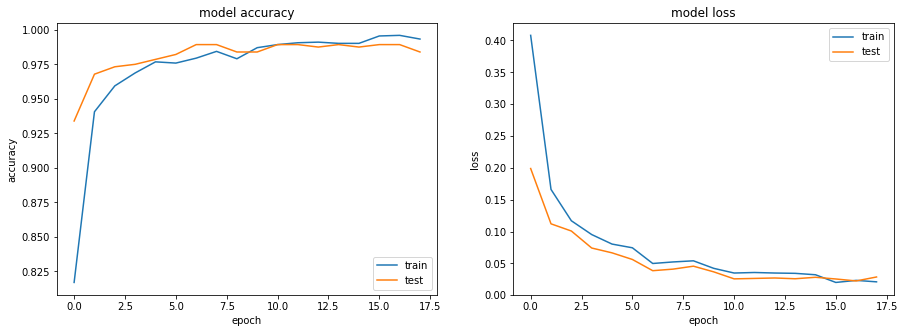

In [18]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15,5))

left = fig.add_subplot(1, 2, 1)
right = fig.add_subplot(1, 2, 2)

left.plot(history.history['accuracy'])
left.plot(history.history['val_accuracy'])
left.set_title('model accuracy')
left.set_ylabel('accuracy')
left.set_xlabel('epoch')
left.legend(['train', 'test'], loc='lower right')

right.plot(history.history['loss'])
right.plot(history.history['val_loss'])
right.set_title('model loss')
right.set_ylabel('loss')
right.set_xlabel('epoch')
right.legend(['train', 'test'], loc='upper right')

plt.show()


# Testing the model on unseen data

In [19]:
import PIL

# image = Image.open('scenes/scenes/lb_4.png')
image = PIL.Image.open('scenes/scenes/sfbay_1.png')
pix = image.load()


tensor = np.array(image).astype('uint8') / 255

n_spectrum = 3
width = image.size[0]
height = image.size[1]

In [20]:
# creat vector
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])


# currently unused
import math

def euclidian_distance(a, b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def manhattan_distance(a, b):
    return abs((a[0] - b[0]) + (a[1] - b[1]))  

In [21]:
picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)

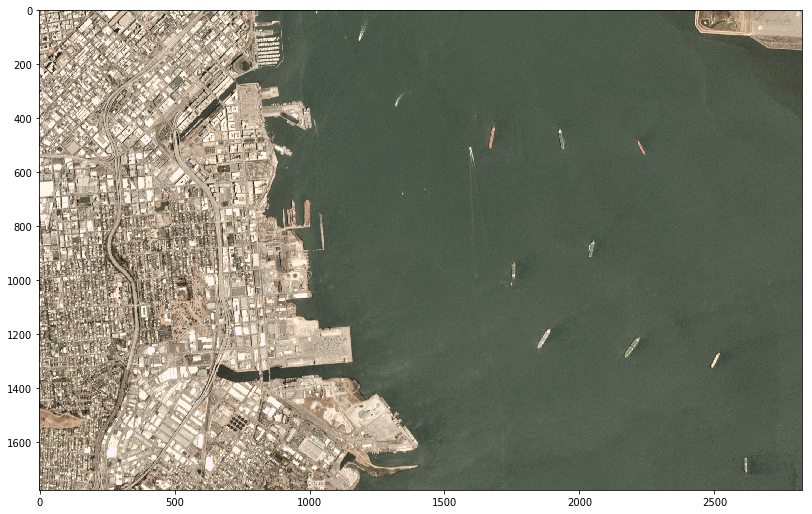

In [22]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show()    

In [23]:
picture_tensor = picture_tensor.transpose(2,0,1)

# Search in the image

In [29]:
width, height = image.size
STEP_SIZE = 20

ships = {}

for row in range(0, height, STEP_SIZE):
    for col in range(0, width, STEP_SIZE):
        area = tensor[row:row+80, col:col+80, 0:3]
        
        if area.shape != (80, 80, 3):
            continue
            
        prediction = model.predict(np.array([area]))
        score = prediction[0][1]
        
        if score > 0.8:
            print(f"found ship at [{row},{col}] with score {score}")
            ships[row, col] = score

found ship at [20,2400] with score 0.9927819967269897
found ship at [420,1640] with score 0.9997178912162781
found ship at [440,1640] with score 0.990131139755249
found ship at [440,1900] with score 0.9372158050537109
found ship at [460,1900] with score 0.9922966361045837
found ship at [480,860] with score 0.9889634847640991
found ship at [500,1560] with score 0.9994420409202576
found ship at [700,900] with score 0.8507227897644043
found ship at [720,900] with score 0.9272700548171997
found ship at [840,2000] with score 0.809447169303894
found ship at [920,1720] with score 0.9976344108581543
found ship at [940,1720] with score 0.9945959448814392
found ship at [1160,1840] with score 0.9910131096839905
found ship at [1200,1820] with score 0.8885812759399414
found ship at [1200,2160] with score 0.9974193572998047
found ship at [1260,2460] with score 0.9993234872817993
found ship at [1640,2580] with score 0.9957103729248047
found ship at [1660,1240] with score 0.8981707096099854
found ship

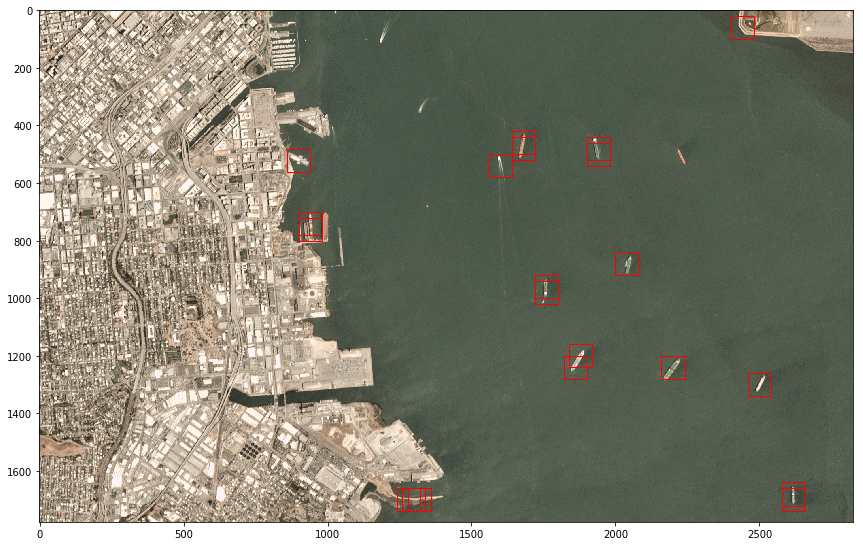

In [30]:
from matplotlib import pyplot as plt
from matplotlib import patches

fig = plt.figure(figsize=(16,32))
ax = fig.add_subplot(3, 1, 1)

ax.imshow(tensor)

for ship in ships:
    row, col = ship
    ax.add_patch(patches.Rectangle((col, row), 80, 80, edgecolor='r', facecolor='none'))

plt.show()